In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

1. Data Collection

In [ ]:
# load data
data=pd.read_csv('dataset.csv')
data.head()

# drop unnamed col
data=data.iloc[:,1:]

data.columns

data.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


2. Data Preprocessing

In [ ]:
# checking null value
data.isnull().sum()

# there is no any null value

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [ ]:
# checking dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


In [ ]:
# convert into date time and sort according to date
data['timestamp']=pd.to_datetime(data['timestamp'])
data['date']=pd.to_datetime(data['date'])
data.dtypes
data.sort_values('date',inplace=True)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_col=['open','high','low','close','volume','marketCap']
data[num_col]=scaler.fit_transform(data[num_col])
data

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,-0.144753,-0.144040,-0.145081,-0.144282,-0.229533,-0.179447,2013-05-05 23:59:59.999000+00:00,Bitcoin,2013-05-05
1,-0.165666,-0.165362,-0.165516,-0.165736,-0.229533,-0.195797,2013-05-05 23:59:59.999000+00:00,Litecoin,2013-05-05
2,-0.144165,-0.142954,-0.145180,-0.144972,-0.229533,-0.179976,2013-05-06 23:59:59.999000+00:00,Bitcoin,2013-05-06
3,-0.165647,-0.165346,-0.165561,-0.165778,-0.229533,-0.195846,2013-05-06 23:59:59.999000+00:00,Litecoin,2013-05-06
4,-0.144878,-0.145032,-0.146940,-0.145124,-0.229533,-0.180088,2013-05-07 23:59:59.999000+00:00,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...
72912,3.505137,3.473183,3.598909,3.570970,2.071279,4.808557,2022-10-23 23:59:59.999000+00:00,Bitcoin,2022-10-23
72913,-0.166143,-0.165861,-0.165978,-0.166230,0.234346,0.091870,2022-10-23 23:59:59.999000+00:00,Binance USD,2022-10-23
72914,-0.166281,-0.165994,-0.166121,-0.166367,-0.225649,-0.190980,2022-10-23 23:59:59.999000+00:00,Basic Attention Token,2022-10-23
72916,-0.164625,-0.164148,-0.164417,-0.164556,-0.066958,-0.179697,2022-10-23 23:59:59.999000+00:00,Aptos,2022-10-23


3.  Feature Engineering

In [ ]:

# volatility Calculation
data['volatility']=(data['high']-data['low'])/data['close']

# Rolling volatility (7-day)
data['volatility_7d'] = data['close'].rolling(7).std()

# Rolling volatility (14-day)
data['volatility_14d'] = data['close'].rolling(14).std()

# Moving average (7 days and 14 days)
data['ma7']=data['close'].rolling(7).mean()
data['ma14']=data['close'].rolling(14).mean()

# Liquidity ratio 
data['liquidity_ratio']=data['volume']/data['marketCap']

In [ ]:
# checking null value
data.isna().sum()

# drop null values
data.dropna(inplace=True)

4. EDA(Exploratory Data Analysis)

In [ ]:
# correlation
num_col=data.select_dtypes(include=np.number)
num_col

cor=num_col.corr()
cor

,open,high,low,close,volume,marketCap,volatility,volatility_7d,volatility_14d,ma7,ma14,liquidity_ratio
open,1.000000,0.997202,0.999396,9.992267e-01,0.266751,6.704195e-01,3.172537e-04,0.371919,0.263046,0.375885,0.269980,2.132317e-03
high,0.997202,1.000000,0.996678,9.969887e-01,0.266202,6.670313e-01,3.779453e-03,0.371146,0.262507,0.374976,0.269337,2.167191e-03
low,0.999396,0.996678,1.000000,9.995718e-01,0.264722,6.702958e-01,-7.190268e-04,0.371948,0.262963,0.375766,0.269784,2.157521e-03
close,0.999227,0.996989,0.999572,1.000000e+00,0.266570,6.709561e-01,-3.366460e-07,0.372192,0.263235,0.376004,0.270111,2.140189e-03
volume,0.266751,0.266202,0.264722,2.665704e-01,1.000000,4.636330e-01,3.910797e-03,0.140497,0.135006,0.141083,0.132916,-3.604352e-03
marketCap,0.670419,0.667031,0.670296,6.709561e-01,0.463633,1.000000e+00,-1.480534e-04,0.276201,0.216676,0.280221,0.219828,2.394078e-07
volatility,0.000317,0.003779,-0.000719,-3.366460e-07,0.003911,-1.480534e-04,1.000000e+00,-0.000139,-0.001777,0.000422,-0.000944,1.142080e-03
volatility_7d,0.371919,0.371146,0.371948,3.721921e-01,0.140497,2.762007e-01,-1.391537e-04,1.000000,0.702079,0.985411,0.701848,8.422995e-03
volatility_14d,0.263046,0.262507,0.262963,2.632351e-01,0.135006,2.166755e-01,-1.777333e-03,0.702079,1.000000,0.693562,0.977384,6.704479e-03
ma7,0.375885,0.374976,0.375766,3.760036e-01,0.141083,2.802213e-01,4.220831e-04,0.985411,0.693562,1.000000,0.709606,7.981385e-03


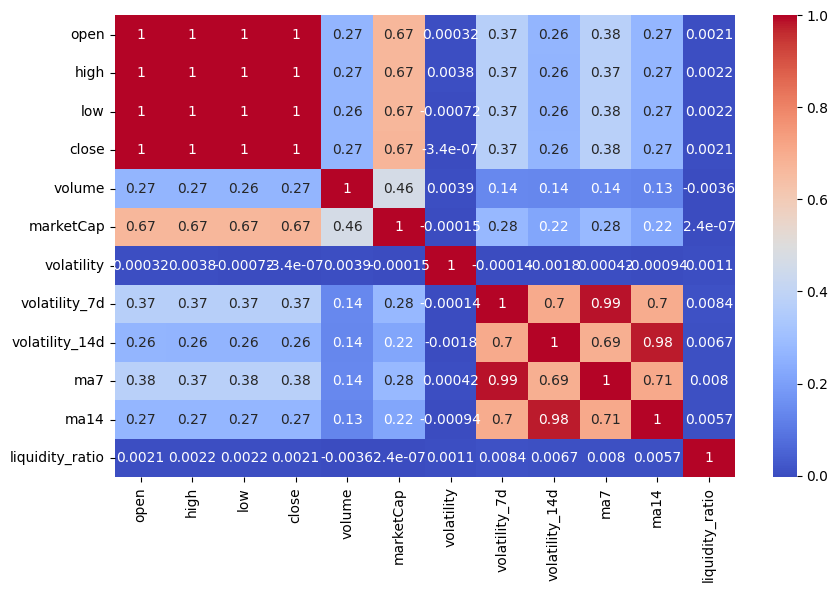

In [ ]:
# correlation heatmap
plt.figure(figsize=(10,6))
num_col=data.select_dtypes(include=np.number)
sns.heatmap(num_col.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# 5. Model Building 
x=data.drop(['volatility','timestamp','date','crypto_name'],axis=1)
y=data['volatility']
x.head()
y

# train test split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

xtrain.shape,xtest.shape

((51053, 11), (21880, 11))

In [ ]:
# create model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(xtrain,ytrain)


KeyboardInterrupt: 

In [ ]:
# model evaluation
ypred=model.predict(xtest)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(ytest,ypred))
print(mean_absolute_error(ytest,ypred))
print(mean_squared_error(ytest,ypred))

0.07904606884831633
0.007398517853738614
0.04388182611410028


6. Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

param={
    'n_estimators':[50,150,200],
    'max_depth':[5,10]
}

grid=GridSearchCV(RandomForestRegressor(),param_grid=param,cv=3,verbose=2)
grid.fit(xtrain,ytrain)



KeyboardInterrupt: 

In [ ]:
# final model 
final_model=grid.best_estimator_

# prediction
ypred=final_model.predict(xtest)

# evaluation metrics
print(r2_score(ytest,ypred))
print(mean_absolute_error(ytest,ypred))
print(mean_squared_error(ytest,ypred))